<a href="https://colab.research.google.com/github/Jalpapatel12/devnet-practice/blob/master/Random_forest_churn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-80.csv')

In [3]:
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Data Wrangling

In [4]:
# Sum of Missing Values
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#Data preprocessing

In [5]:
# Categorical values must be converted numerical labels using label encoder, one hot encoding
# Label Encoder is used for mapping categorical values to 0,1,2,3...
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [6]:
churn_df['International plan'].drop_duplicates()

0     No
3    Yes
Name: International plan, dtype: object

In [7]:
le_encoder.fit(churn_df['International plan'])

LabelEncoder()

In [8]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])

In [9]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [10]:
le_encoder.fit(churn_df['Voice mail plan'])

LabelEncoder()

In [11]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])

In [12]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


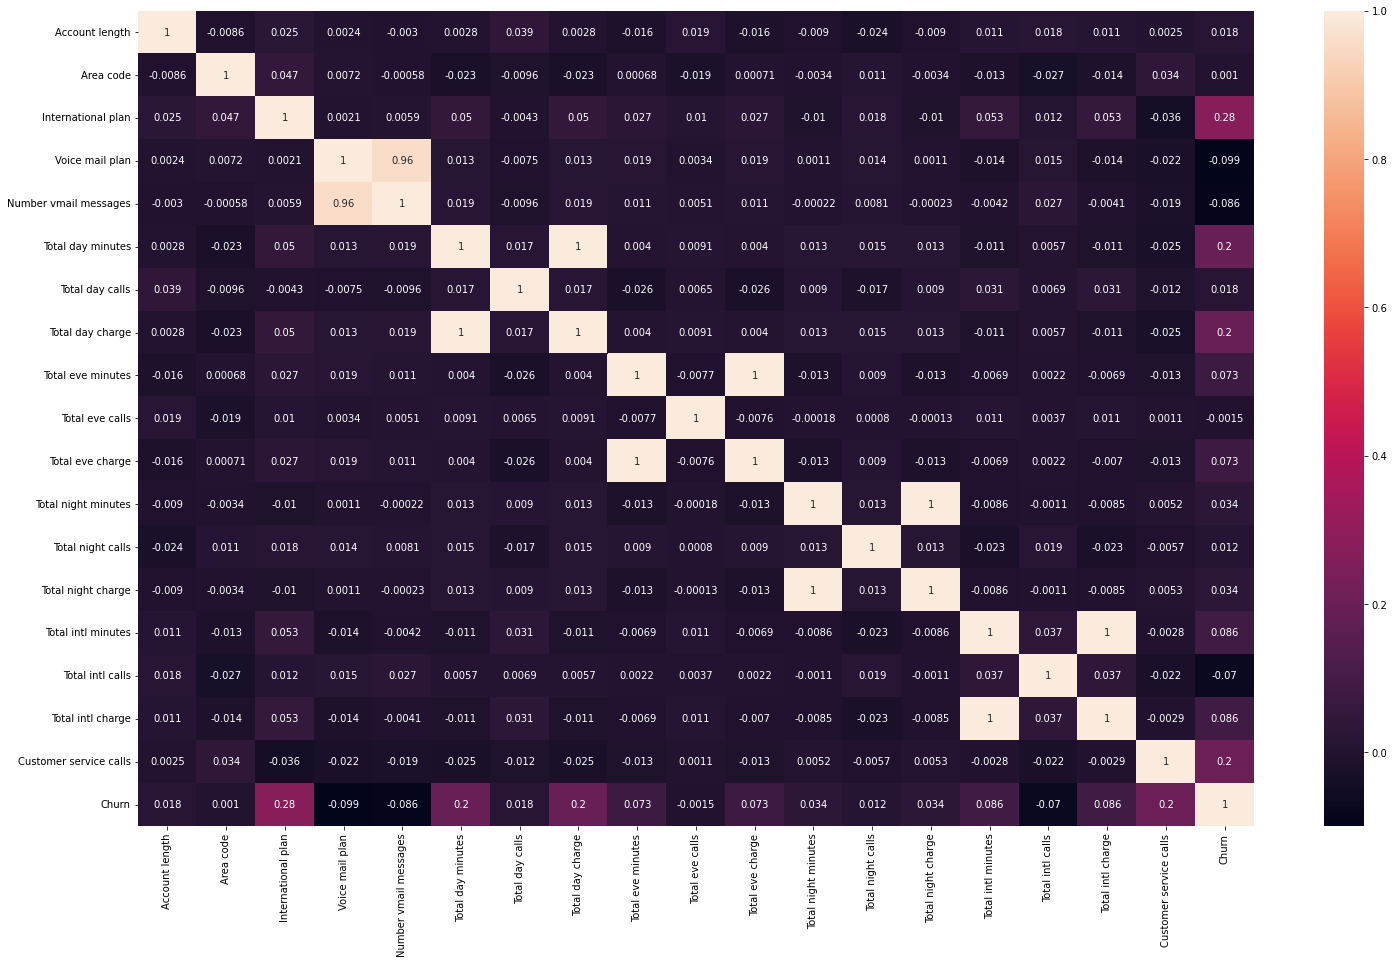

In [13]:
plt.figure(figsize = (25,15))
sns.heatmap(churn_df.corr(), annot = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


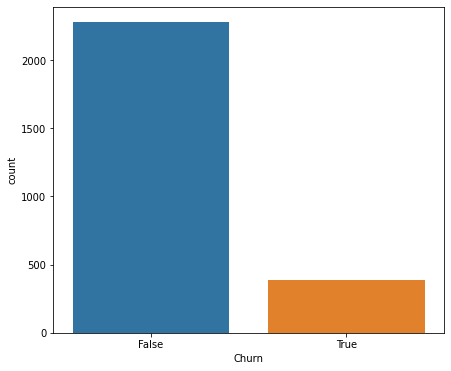

In [14]:
# Imbalanaced Class Data
plt.figure(figsize = (7,6))
sns.countplot('Churn', data = churn_df)

In [15]:
churn_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

Data Augmentation

In [16]:
# Resample - To generate random samples for each class
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [17]:
# Apply resample
df_1_upsample = resample(df_1, n_samples = 1139, replace = True, random_state = 123)

In [18]:
# Merge
churn_df1 = pd.concat([df_0, df_1_upsample])

In [19]:
churn_df1['Churn'].value_counts()/len(churn_df1['Churn'])

False    0.666667
True     0.333333
Name: Churn, dtype: float64

##Features & Target

In [20]:
churn_df1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [21]:
X = churn_df1.drop(['State','Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge','Churn'], axis = 1)
Y = churn_df1['Churn']

##Train & Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

##Decision Tree Classifier

#here we have set maximum depth to 10 , if i set to 12 then it is overfitting.

In [23]:
from sklearn.tree import DecisionTreeClassifier
# criterion='entropy', 'gini'
clf_tree = DecisionTreeClassifier(criterion = 'entropy', class_weight = {0: 66.67, 1: 33.33}, max_depth = 10)

In [24]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 66.67, 1: 33.33}, criterion='entropy',
                       max_depth=10)

In [25]:
clf_tree.score(X_test, Y_test)

0.945906432748538

In [26]:
clf_tree.score(X_train, Y_train)

0.9623124771313575

In [27]:
clf_tree.get_depth()

10

#Plotting Decsion Tree

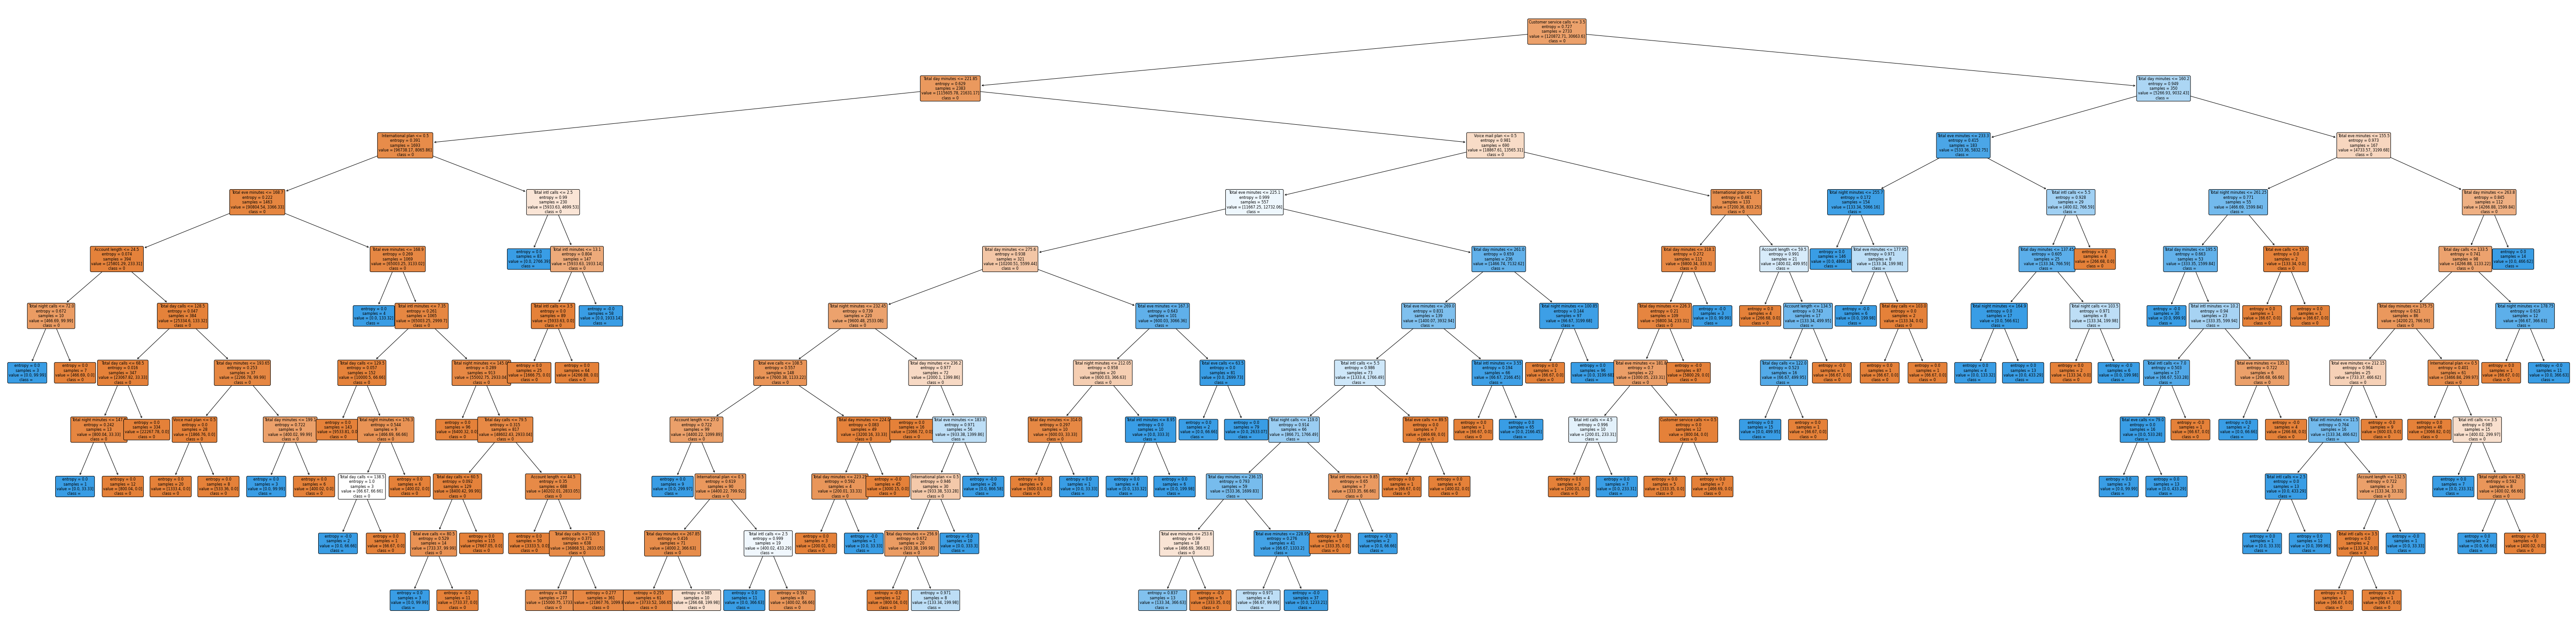

In [28]:
from sklearn import tree
fig = plt.figure(figsize = (100, 25))
_ = tree.plot_tree(clf_tree, feature_names = X.columns, class_names = str(churn_df1.Churn), filled = True, 
                   rounded = True, fontsize = 8)

#Classification Tree

In [29]:
predictions = clf_tree.predict(X_test)

#Classification Metrics

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, predictions)

array([[449,  16],
       [ 21, 198]])

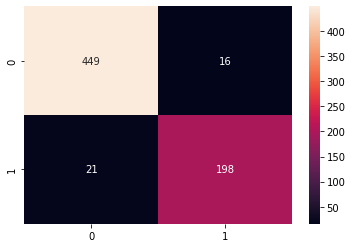

In [31]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt = '0.0f')

In [32]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       465
        True       0.93      0.90      0.91       219

    accuracy                           0.95       684
   macro avg       0.94      0.93      0.94       684
weighted avg       0.95      0.95      0.95       684



#Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf_rf = RandomForestClassifier(bootstrap = True, n_estimators = 30, criterion = "entropy", max_depth=12)

In [35]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=30)

In [36]:
clf_rf.score(X_test, Y_test)

0.9707602339181286

In [37]:
clf_rf.score(X_train, Y_train)

0.9875594584705452

In [38]:
predictions = clf_rf.predict(X_test)

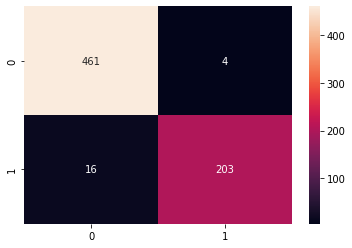

In [39]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt = '0.0f')

In [40]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       465
        True       0.98      0.93      0.95       219

    accuracy                           0.97       684
   macro avg       0.97      0.96      0.97       684
weighted avg       0.97      0.97      0.97       684



#Make New Predcitions

In [41]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,141,415,0,1,322.4,92,283.2,107,209.5,111,6.7,3,1
268,86,415,0,0,128.3,121,197.1,93,138.4,152,12.2,5,7
1300,116,408,0,0,159.4,79,179.5,88,167.8,71,9.7,2,6
1775,71,415,0,0,278.9,110,190.2,67,255.2,84,11.7,7,0


In [42]:
X_new = [[128,	415,	0,	1,	285.1,	130,	217.4,	89,	244.7,	91,	10.0,	4,	3]]

In [43]:
print(clf_rf.predict(X_new))

[False]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
